#Coffee Sales Forecasting
  

- **Dataset:** This dataset contains detailed records of coffee sales from a vending machine.
- **Goal:** Predict the number of cups expected to be sold on each of the next 7 days.
- **Metric:** Absolute difference in the number of cups sold.

In [2]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

In [1]:
from pmdarima import auto_arima
import numpy as np

In [3]:
df = pd.read_csv("/content/index_1.csv")
df["date"] = pd.to_datetime(df["date"])

date_range = pd.date_range(start=df["date"].min(), end=df["date"].max())
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_by_date = df.groupby("date").agg({"money": ["count"]}).reset_index()
df_by_date.columns = ["date", "cups"]
df_complete = pd.merge(complete_dates, df_by_date, on="date", how="left")
df_complete.fillna(0, inplace=True)

In [4]:
test_size = 7
train_size = df_complete.shape[0] - test_size
df_train = df_complete.iloc[:train_size]
df_test = df_complete.iloc[train_size:]
metrics = []

(0.0, 27.3)

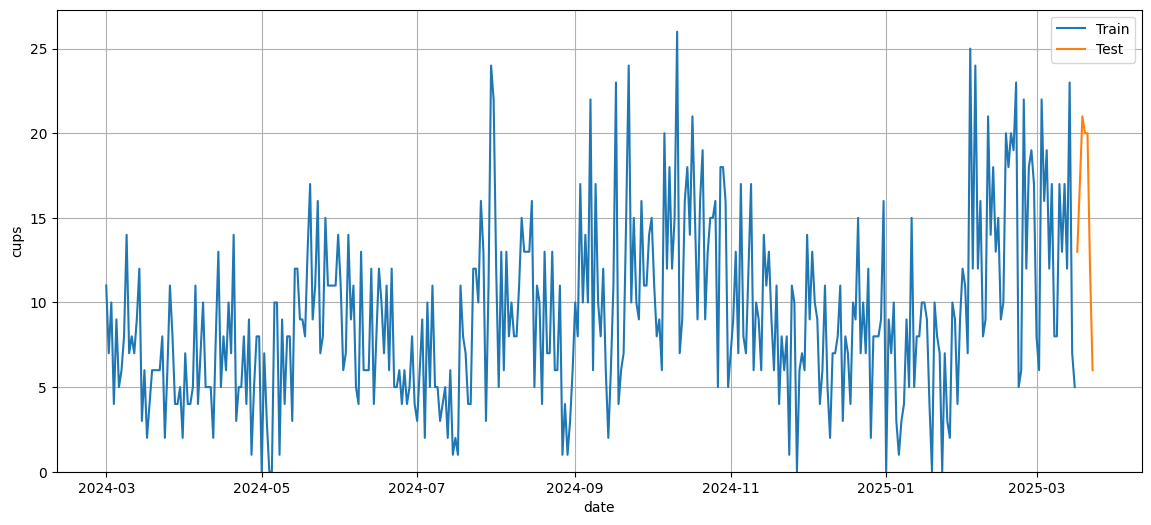

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
plt.grid()
plt.ylim(0)

<a id="2"></a>
<h2 style='background:#66462F; border:0; color:white'><center>ARIMA<center><h2>

In [6]:
p, d, q = 5, 0, 5
model = ARIMA(df_train['cups'], order=(p, d, q))
model_fit = model.fit()

In [7]:
test_predictions = model_fit.forecast(steps=len(df_test)).values
df_test["arima_pred"] = test_predictions

(0.0, 27.3)

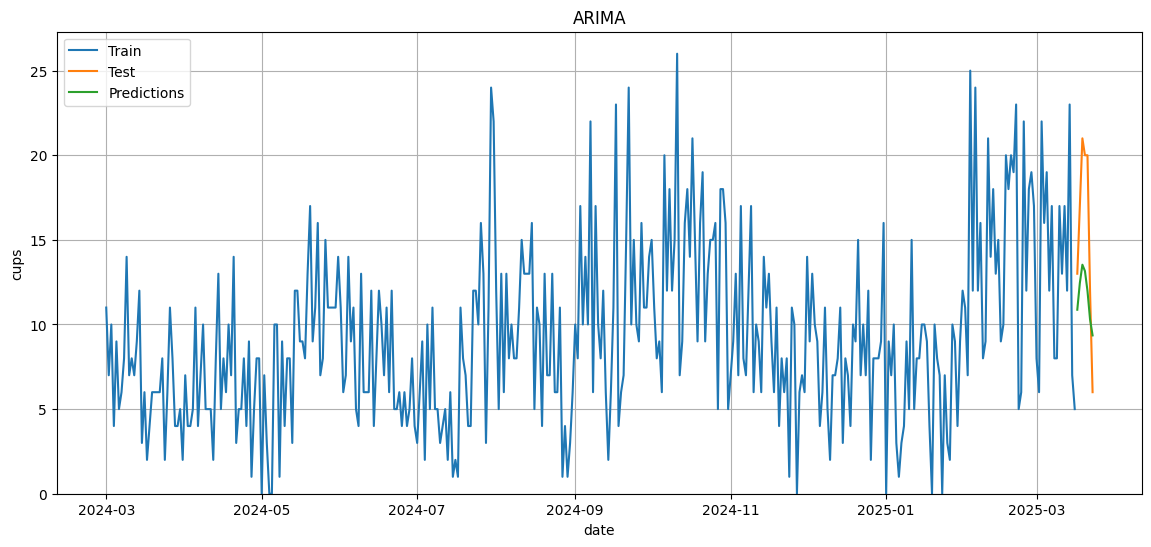

In [8]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="arima_pred", x="date", label="Predictions")
plt.title('ARIMA')
plt.grid()
plt.ylim(0)

In [9]:
df_test

,date,cups,arima_pred
381,2025-03-17,13.0,10.872484
382,2025-03-18,17.0,12.451159
383,2025-03-19,21.0,13.532842
384,2025-03-20,20.0,13.158163
385,2025-03-21,20.0,11.982517
386,2025-03-22,12.0,10.308152
387,2025-03-23,6.0,9.354710


In [10]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "ARIMA", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.864199023571616


<a id="3"></a>
<h2 style='background:#66462F; border:0; color:white'><center>SARIMAX<center><h2>

In [11]:
p, d, q = 5, 0, 5
P, D, Q, m = 1, 1, 1, 7
model = SARIMAX(df_train['cups'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

In [12]:
test_predictions = model_fit.forecast(steps=len(df_test)).values
df_test["sarimax_pred"] = test_predictions

(0.0, 27.3)

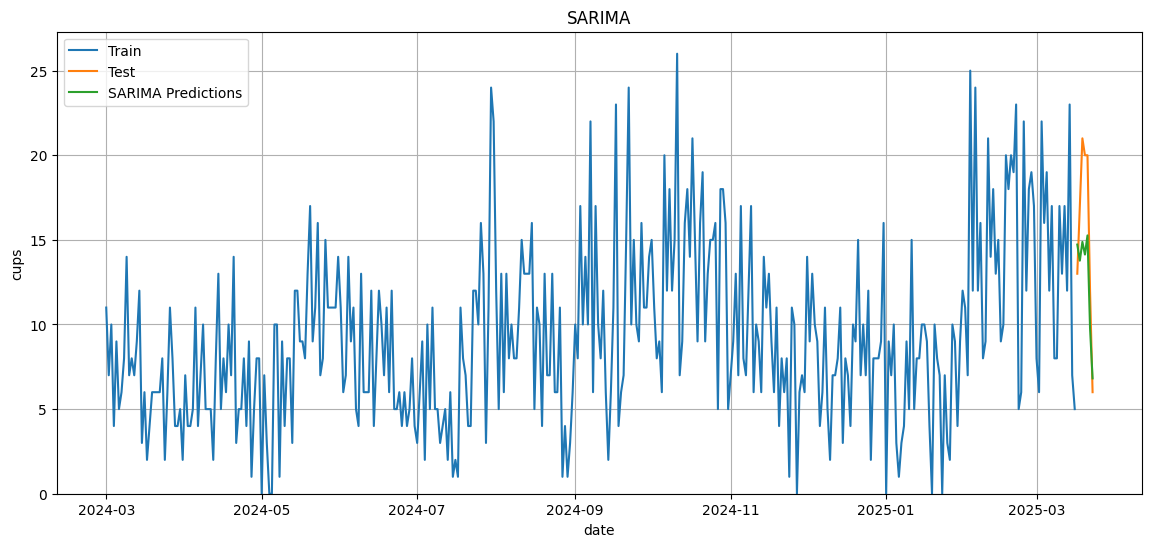

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="sarimax_pred", x="date", label="SARIMA Predictions")
plt.title('SARIMA')
plt.grid()
plt.ylim(0)

In [14]:
df_test

,date,cups,arima_pred,sarimax_pred
381,2025-03-17,13.0,10.872484,14.722307
382,2025-03-18,17.0,12.451159,13.773045
383,2025-03-19,21.0,13.532842,14.880054
384,2025-03-20,20.0,13.158163,14.134832
385,2025-03-21,20.0,11.982517,15.263619
386,2025-03-22,12.0,10.308152,9.788948
387,2025-03-23,6.0,9.354710,6.816413


In [15]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "SARIMAX", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3.528317438744953


<a id="4"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Auto ARIMA<center><h2>

In [16]:
model = auto_arima(
    df_train['cups'],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2240.755, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2440.275, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2332.681, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2235.009, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2438.278, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2236.915, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2236.914, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2238.763, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2233.127, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2235.026, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2235.025, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2330.684, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2236.876, Time=0.21 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.899 seconds


In [17]:
test_predictions = model.predict(n_periods=len(df_test)).values
df_test["auto_arima_pred"] = test_predictions

(0.0, 27.3)

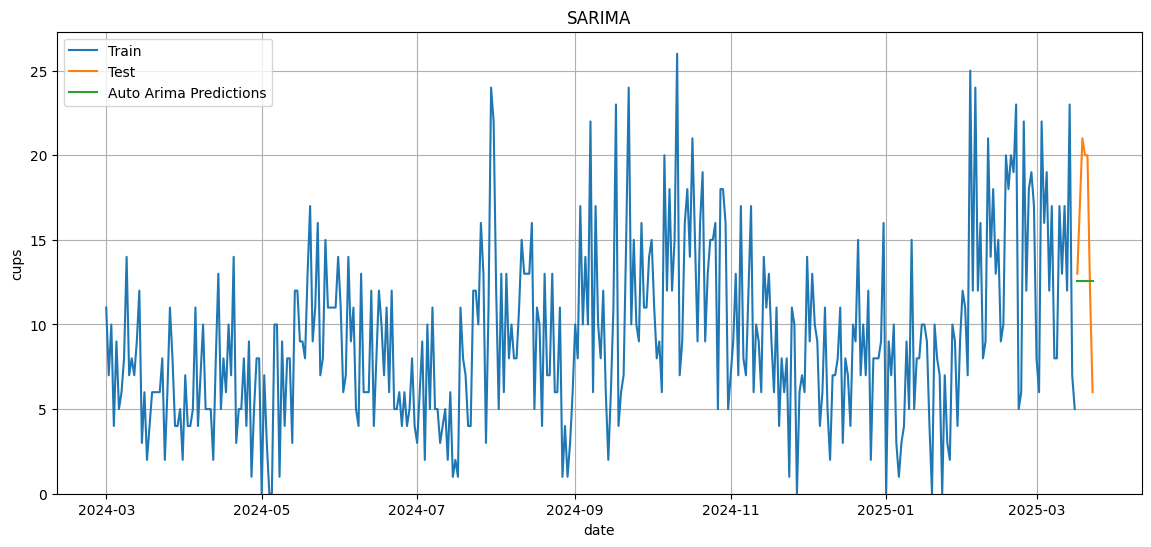

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="auto_arima_pred", x="date", label="Auto Arima Predictions")
plt.title('SARIMA')
plt.grid()
plt.ylim(0)

In [19]:
df_test

,date,cups,arima_pred,sarimax_pred,auto_arima_pred
381,2025-03-17,13.0,10.872484,14.722307,12.582004
382,2025-03-18,17.0,12.451159,13.773045,12.582004
383,2025-03-19,21.0,13.532842,14.880054,12.582004
384,2025-03-20,20.0,13.158163,14.134832,12.582004
385,2025-03-21,20.0,11.982517,15.263619,12.582004
386,2025-03-22,12.0,10.308152,9.788948,12.582004
387,2025-03-23,6.0,9.354710,6.816413,12.582004


In [20]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "Auto ARIMA", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 5.036283790831582


<a id="5"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Auto SARIMAX<center><h2>

In [21]:
model = auto_arima(
    df_train['cups'],
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2231.656, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2440.275, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2330.036, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2233.936, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2438.278, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=2239.005, Time=1.01 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=2238.030, Time=1.06 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=2232.902, Time=10.67 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=2232.843, Time=10.22 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=2240.755, Time=0.95 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=2236.945, Time=1.85 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=2235.121, Time=1.65 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=2233.294, Time=16.64 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=2229.867, Time=8.24 sec
 ARIMA(1,1,2)(0,0,1)[7] interc

In [22]:
test_predictions = model.predict(n_periods=len(df_test)).values
df_test["auto_sarimax_pred"] = test_predictions

(0.0, 27.3)

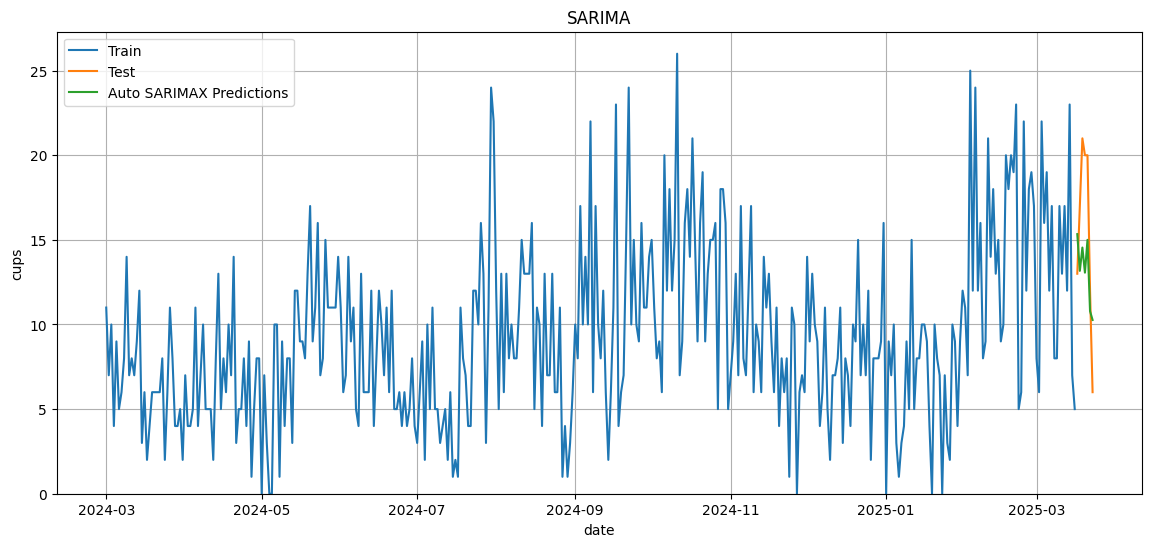

In [23]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="auto_sarimax_pred", x="date", label="Auto SARIMAX Predictions")
plt.title('SARIMA')
plt.grid()
plt.ylim(0)

In [24]:
df_test

,date,cups,arima_pred,sarimax_pred,auto_arima_pred,auto_sarimax_pred
381,2025-03-17,13.0,10.872484,14.722307,12.582004,15.339486
382,2025-03-18,17.0,12.451159,13.773045,12.582004,13.169362
383,2025-03-19,21.0,13.532842,14.880054,12.582004,14.546438
384,2025-03-20,20.0,13.158163,14.134832,12.582004,13.062993
385,2025-03-21,20.0,11.982517,15.263619,12.582004,15.003056
386,2025-03-22,12.0,10.308152,9.788948,12.582004,10.789369
387,2025-03-23,6.0,9.354710,6.816413,12.582004,10.267653


In [25]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "Auto SARIMAX", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.29084603520864


<a id="6"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Custom Auto ARIMA<center><h2>

In [26]:
train_data, val_data = train_test_split(df_train['cups'], test_size=0.2, shuffle=False)

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

tmp_metrics = []

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()

        val_predictions = model_fit.forecast(steps=len(val_data)).values
        val_data_pred = pd.Series(val_predictions, index=val_data.index)

        mae = mean_absolute_error(val_data, val_data_pred)

        tmp_metrics.append({"model": f"ARIMA({p},{d},{q})", "mae": mae})
        print(f'ARIMA({p},{d},{q}) - Mean Absolute Error: {mae}')

    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed with error: {e}")

tmp_results_df = pd.DataFrame(tmp_metrics)

best_params = tmp_results_df.loc[tmp_results_df['mae'].idxmin()]
print(f'Best parameters: {best_params["model"]}, MAE: {best_params["mae"]}')

p_best, d_best, q_best = map(int, best_params["model"][6:-1].split(","))
best_model = ARIMA(df_train['cups'], order=(p_best, d_best, q_best))
best_model_fit = best_model.fit()

ARIMA(0,0,0) - Mean Absolute Error: 5.172079155643711
ARIMA(0,0,1) - Mean Absolute Error: 5.173489510583259
ARIMA(0,0,2) - Mean Absolute Error: 5.1756539060164135
ARIMA(0,0,3) - Mean Absolute Error: 5.1710727194488655
ARIMA(0,0,4) - Mean Absolute Error: 5.187190357246554
ARIMA(0,0,5) - Mean Absolute Error: 5.202944663592945
ARIMA(0,1,0) - Mean Absolute Error: 5.363636363636363
ARIMA(0,1,1) - Mean Absolute Error: 5.401370284681406
ARIMA(0,1,2) - Mean Absolute Error: 5.402243770498106
ARIMA(0,1,3) - Mean Absolute Error: 5.407299809471828
ARIMA(0,1,4) - Mean Absolute Error: 5.409461183251218
ARIMA(0,1,5) - Mean Absolute Error: 5.439023661453035
ARIMA(1,0,0) - Mean Absolute Error: 5.175538353035618
ARIMA(1,0,1) - Mean Absolute Error: 5.191259549709137
ARIMA(1,0,2) - Mean Absolute Error: 5.189224352426559
ARIMA(1,0,3) - Mean Absolute Error: 5.180973980165732
ARIMA(1,0,4) - Mean Absolute Error: 5.180402827941015
ARIMA(1,0,5) - Mean Absolute Error: 5.183087992795307
ARIMA(1,1,0) - Mean Absolu

In [27]:
df_test

,date,cups,arima_pred,sarimax_pred,auto_arima_pred,auto_sarimax_pred
381,2025-03-17,13.0,10.872484,14.722307,12.582004,15.339486
382,2025-03-18,17.0,12.451159,13.773045,12.582004,13.169362
383,2025-03-19,21.0,13.532842,14.880054,12.582004,14.546438
384,2025-03-20,20.0,13.158163,14.134832,12.582004,13.062993
385,2025-03-21,20.0,11.982517,15.263619,12.582004,15.003056
386,2025-03-22,12.0,10.308152,9.788948,12.582004,10.789369
387,2025-03-23,6.0,9.354710,6.816413,12.582004,10.267653


In [28]:
test_predictions = model_fit.forecast(steps=len(df_test)).values
df_test["custom_auto_arima_pred"] = test_predictions

(0.0, 27.3)

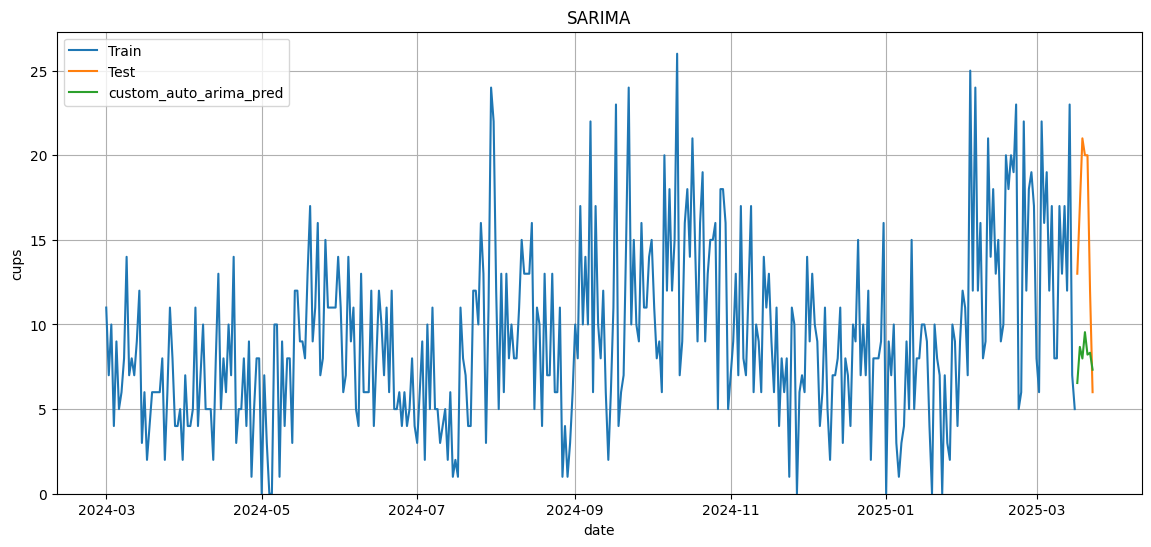

In [29]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="custom_auto_arima_pred", x="date", label="custom_auto_arima_pred")
plt.title('SARIMA')
plt.grid()
plt.ylim(0)

In [30]:
df_test

,date,cups,arima_pred,sarimax_pred,auto_arima_pred,auto_sarimax_pred,custom_auto_arima_pred
381,2025-03-17,13.0,10.872484,14.722307,12.582004,15.339486,6.542230
382,2025-03-18,17.0,12.451159,13.773045,12.582004,13.169362,8.675127
383,2025-03-19,21.0,13.532842,14.880054,12.582004,14.546438,7.991568
384,2025-03-20,20.0,13.158163,14.134832,12.582004,13.062993,9.547119
385,2025-03-21,20.0,11.982517,15.263619,12.582004,15.003056,8.220395
386,2025-03-22,12.0,10.308152,9.788948,12.582004,10.789369,8.331008
387,2025-03-23,6.0,9.354710,6.816413,12.582004,10.267653,7.328630


In [31]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "Custom Auto ARIMA", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.860168754718093


<a id="7"></a>
<h2 style='background:#66462F; border:0; color:white'><center>LightGBM<center><h2>

In [32]:
from lightgbm import LGBMRegressor

In [33]:
FEATURES = []

num_lags = 3
for lag in range(1, num_lags + 1):
    df_train[f'lag_{lag}'] = df_train['cups'].shift(lag)
    FEATURES.append(f'lag_{lag}')

In [34]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['cups']), df_train['cups'], test_size=0.2, shuffle=False)

model = LGBMRegressor(learning_rate=0.1, num_leaves=31, n_estimators=100)
model.fit(X_train[FEATURES], y_train)

val_predictions = model.predict(X_val[FEATURES])
mae = mean_absolute_error(y_val, val_predictions)
print(f'Mean Absolute Error on validation set: {mae}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 3
[LightGBM] [Info] Start training from score 8.776316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [35]:
X_test = y_val[-num_lags:][::-1].values

test_predictions = []

for i in range(len(df_test)):
    pred = model.predict(pd.DataFrame(X_test[:num_lags].reshape(1, -1), columns=FEATURES))[0]

    test_predictions.append(pred)

    X_test = np.array([pred] + X_test.tolist())

df_test["lgbm_pred"] = test_predictions

In [36]:
df_test

,date,cups,arima_pred,sarimax_pred,auto_arima_pred,auto_sarimax_pred,custom_auto_arima_pred,lgbm_pred
381,2025-03-17,13.0,10.872484,14.722307,12.582004,15.339486,6.542230,11.616102
382,2025-03-18,17.0,12.451159,13.773045,12.582004,13.169362,8.675127,5.133583
383,2025-03-19,21.0,13.532842,14.880054,12.582004,14.546438,7.991568,5.059055
384,2025-03-20,20.0,13.158163,14.134832,12.582004,13.062993,9.547119,6.337026
385,2025-03-21,20.0,11.982517,15.263619,12.582004,15.003056,8.220395,6.473504
386,2025-03-22,12.0,10.308152,9.788948,12.582004,10.789369,8.331008,8.294019
387,2025-03-23,6.0,9.354710,6.816413,12.582004,10.267653,7.328630,5.939121


(0.0, 27.3)

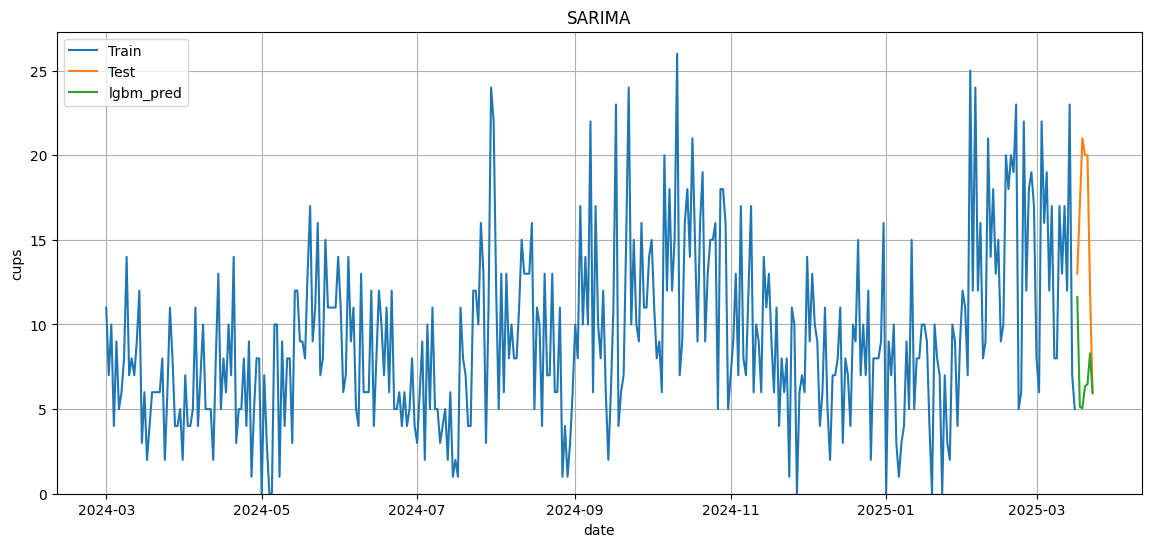

In [37]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_train, y="cups", x="date", label="Train")
sns.lineplot(data=df_test, y="cups", x="date", label="Test")
sns.lineplot(data=df_test, y="lgbm_pred", x="date", label="lgbm_pred")
plt.title('SARIMA')
plt.grid()
plt.ylim(0)

In [38]:
mae = mean_absolute_error(df_test["cups"], test_predictions)
metrics.append({"model": "LightGBM", "mae": mae})
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 8.592512692605402


<a id="100"></a>
<h2 style='background:#66462F; border:0; color:white'><center>Results<center><h2>

In [39]:
df_metrics = pd.DataFrame(metrics)

<Axes: xlabel='mae', ylabel='model'>

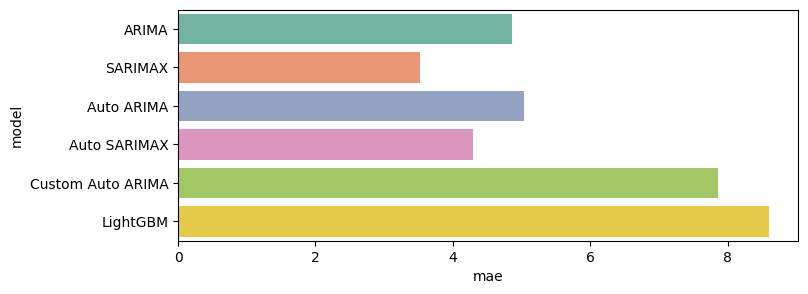

In [42]:
plt.figure(figsize=(8, 1 * df_metrics.shape[0] // 2))
sns.barplot(data=df_metrics, y="model", x="mae",palette="Set2")

In [41]:
df_metrics

,model,mae
0,ARIMA,4.864199
1,SARIMAX,3.528317
2,Auto ARIMA,5.036284
3,Auto SARIMAX,4.290846
4,Custom Auto ARIMA,7.860169
5,LightGBM,8.592513
